In [1]:
import seaborn as sn
import pandas as pd
import numpy as np

In [3]:
data=pd.read_csv('/content/raw_data.csv')
data.head()

,Height (Inches),Weight (Pounds),Age,Grip strength,Frailty
0,65.8,112,30,30,N
1,71.5,136,19,31,N
2,69.4,153,45,29,N
3,68.2,142,22,28,Y
4,67.8,144,29,24,Y


In [4]:
data.isnull().sum()

Height (Inches)    0
Weight (Pounds)    0
Age                0
Grip strength      0
Frailty            0
dtype: int64

In [7]:
data = data.rename(columns={"Height (Inches)": "Height", "Weight (Pounds)": "Weight"})
data.head()

,Height,Weight,Age,Grip strength,Frailty
0,65.8,112,30,30,N
1,71.5,136,19,31,N
2,69.4,153,45,29,N
3,68.2,142,22,28,Y
4,67.8,144,29,24,Y


In [8]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()


data['Frailty']=label.fit_transform(data['Frailty'])
data.head()

,Height,Weight,Age,Grip strength,Frailty
0,65.8,112,30,30,0
1,71.5,136,19,31,0
2,69.4,153,45,29,0
3,68.2,142,22,28,1
4,67.8,144,29,24,1


In [9]:
data.to_csv('clean_data.csv')
data.head()

,Height,Weight,Age,Grip strength,Frailty
0,65.8,112,30,30,0
1,71.5,136,19,31,0
2,69.4,153,45,29,0
3,68.2,142,22,28,1
4,67.8,144,29,24,1


In [12]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1]
X

,Height,Weight,Age,Grip strength
0,65.8,112,30,30
1,71.5,136,19,31
2,69.4,153,45,29
3,68.2,142,22,28
4,67.8,144,29,24
5,68.7,123,50,26
6,69.8,141,51,22
7,70.1,136,23,20
8,67.9,112,17,19
9,66.8,120,39,31


In [13]:
y

0    0
1    0
2    0
3    1
4    1
5    0
6    1
7    1
8    0
9    0
Name: Frailty, dtype: int64

In [14]:
#split train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state= 7)

In [15]:
from sklearn.preprocessing import StandardScaler

In [17]:
ss_train = StandardScaler()
X_train = ss_train.fit_transform(X_train)
ss_test = StandardScaler()
X_test = ss_test.fit_transform(X_test)

In [18]:
from sklearn.linear_model import LogisticRegression
predictions = LogisticRegression.predict(X_test)

TypeError: ignored

In [19]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear', random_state=0)

In [20]:
model.fit(X,y)

LogisticRegression(random_state=0, solver='liblinear')

In [21]:
predictions = model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [22]:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(multi_class='warn', random_state=0, solver='liblinear')

In [23]:
model = LogisticRegression(solver='liblinear', random_state=0).fit(X, y)

In [24]:
model.classes_

array([0, 1])

In [25]:
model.intercept_

array([-0.0044229])

In [26]:
model.coef_

array([[-0.3155332 ,  0.34495263, -0.1445449 , -0.84322573]])

In [27]:

model.predict_proba(X)

array([[9.99992228e-01, 7.77234095e-06],
       [9.89416711e-01, 1.05832893e-02],
       [5.20673368e-01, 4.79326632e-01],
       [3.38680800e-01, 6.61319200e-01],
       [2.09102109e-02, 9.79089789e-01],
       [9.99775967e-01, 2.24032875e-04],
       [3.34717425e-01, 6.65282575e-01],
       [9.93988103e-03, 9.90060119e-01],
       [7.81253207e-01, 2.18746793e-01],
       [9.99989509e-01, 1.04910945e-05]])

In [28]:
model.predict(X)

array([0, 0, 0, 1, 1, 0, 1, 1, 0, 0])

In [29]:

model.score(X, y)

1.0

In [30]:
from sklearn.metrics import confusion_matrix

In [31]:
cm=confusion_matrix(y, model.predict(X))
cm

array([[6, 0],
       [0, 4]])

In [32]:
TN, FP, FN, TP = confusion_matrix(y, model.predict(X)).ravel()

In [33]:
print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

True Positive(TP)  =  4
False Positive(FP) =  0
True Negative(TN)  =  6
False Negative(FN) =  0


In [35]:
precision=TP/(TP+FP)
print('Precision of the binary classifier = {:0.3f}'.format(precision))

Precision of the binary classifier = 1.000


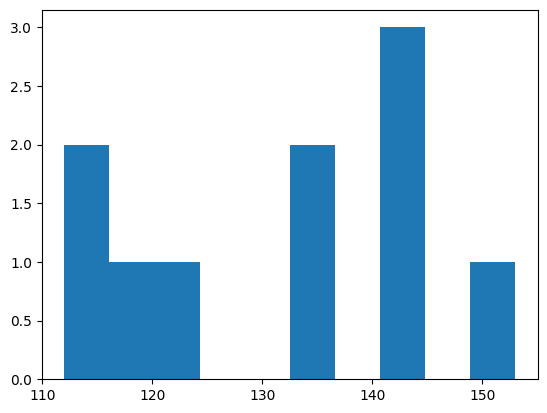

In [36]:
import matplotlib.pyplot as plt
plt.hist(data.Weight)
plt.savefig ('weight_distribution.png')